<a href="https://colab.research.google.com/github/FranekChabr/Portfolio/blob/main/ProjektFranciszekChabros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analiza data setu o filmach

###Spis treści:

1. Liczba filmów wydana w danym roku
2. Najlepsze filmy z każdego dziesięciolecia
3. Najgorsze filmy z każdego dziesięciolecia
4. Średnia popularność filmów względem gatunku
5. Rozkład średnich ocen filmów w zależności od gatunku
6. Liczba filmów w poszczególnych językach
7. Top 10 filmów z największą liczbą głosów
8. Mapa cieplna korelacji między zmiennymi

ML:
1. Regresja - przewidywanie popularności filmu
2. Klasyfikacja - przewidywanie kategorii popularności
3. Klasteryzacja - grupowanie filmów


*data set pozyskany z:*
[*movies-dataset*](https://huggingface.co/datasets/Pablinho/movies-dataset/tree/main)

#EDA

##Sugerowane dodatkowe analizy i możliwości wzbogacenia datasetu
1. Dodanie kategorii wiekowej
2. Stworzenie kategorii długości filmu (krótki/średni/długi)
3. Analiza sezonowości premier filmowych
4. Grupowanie filmów po dekadach
5. Analiza korelacji między popularnością a oceną

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# wczytanie danych
df = pd.read_csv('movies.csv')

# podstawowe informacje o zbiorze
print("Podstawowe informacje o datasecie:")
print(df.info())

# statystyki opisowe dla kolumn numerycznych
print("\nStatystyki opisowe:")
print(df.describe())

# analiza brakujących wartości
print("\nBrakujące wartości:")
print(df.isnull().sum())

# wzbogacenie danych
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Year'] = df['Release_Date'].dt.year
df['Release_Month'] = df['Release_Date'].dt.month

df

Podstawowe informacje o datasecie:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB
None

Statystyki opisowe:
        Popularity
count  9827.000000
mean     40.320672
std     108.875673
min       7.100000
25%      16.127500
50%      21.191000
75%      35.174500
max    5083.954000

Brakujące wartości:
Release_Date          0
Title                 9
Overview   

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year,Release_Month
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021.0,12.0
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022.0,3.0
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022.0,2.0
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021.0,11.0
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...,1973.0,10.0
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...,2020.0,10.0
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...,2016.0,5.0
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,2021.0,3.0


#Wykresiki:

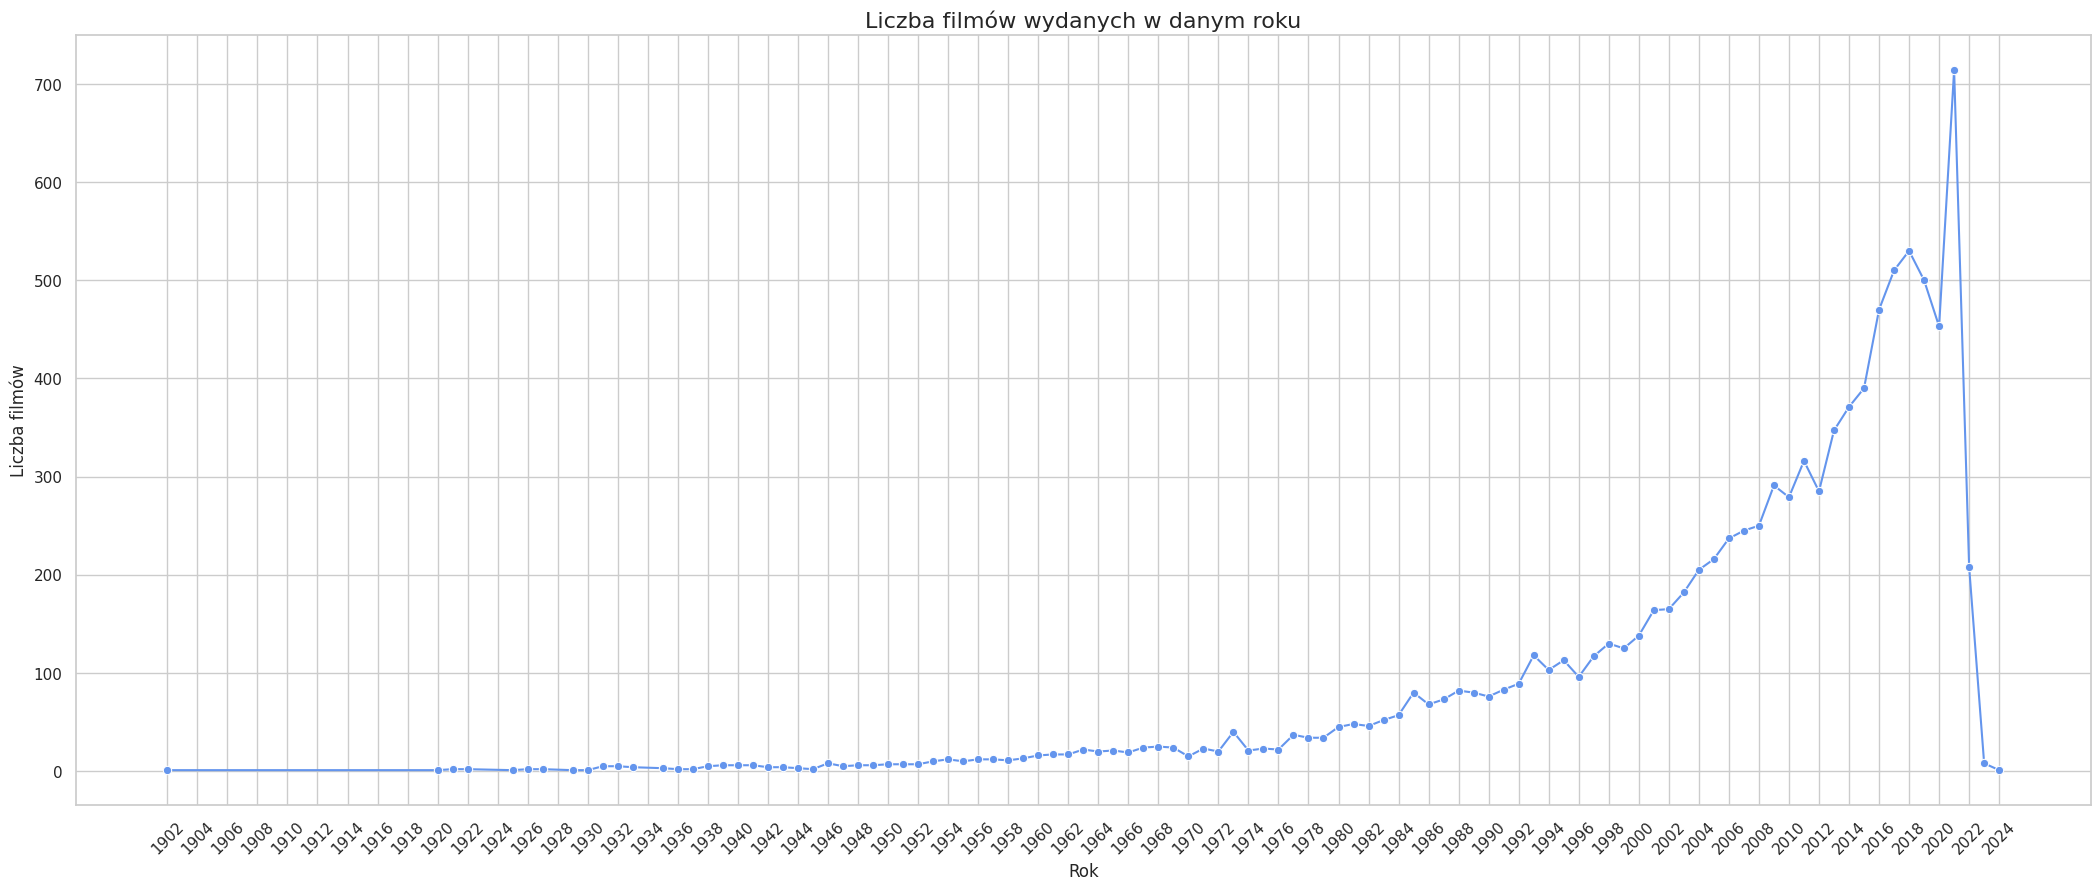

In [ ]:
df["Release_Date"] = pd.to_datetime(df["Release_Date"], errors="coerce")
df["Release_Year"] = df["Release_Date"].dt.year

movies_per_year = df["Release_Year"].value_counts().sort_index()

plt.figure(figsize=(26, 10))
sns.set(style="whitegrid")

sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, color="cornflowerblue", marker="o")

plt.xlabel("Rok", fontsize=12)
plt.ylabel("Liczba filmów", fontsize=12)
plt.title("Liczba filmów wydanych w danym roku", fontsize=16)
plt.xticks(
    ticks=range(int(movies_per_year.index.min()), int(movies_per_year.index.max()) + 1, 2),
    labels=[int(x) for x in range(int(movies_per_year.index.min()), int(movies_per_year.index.max()) + 1, 2)],
    rotation=45
)

plt.show()

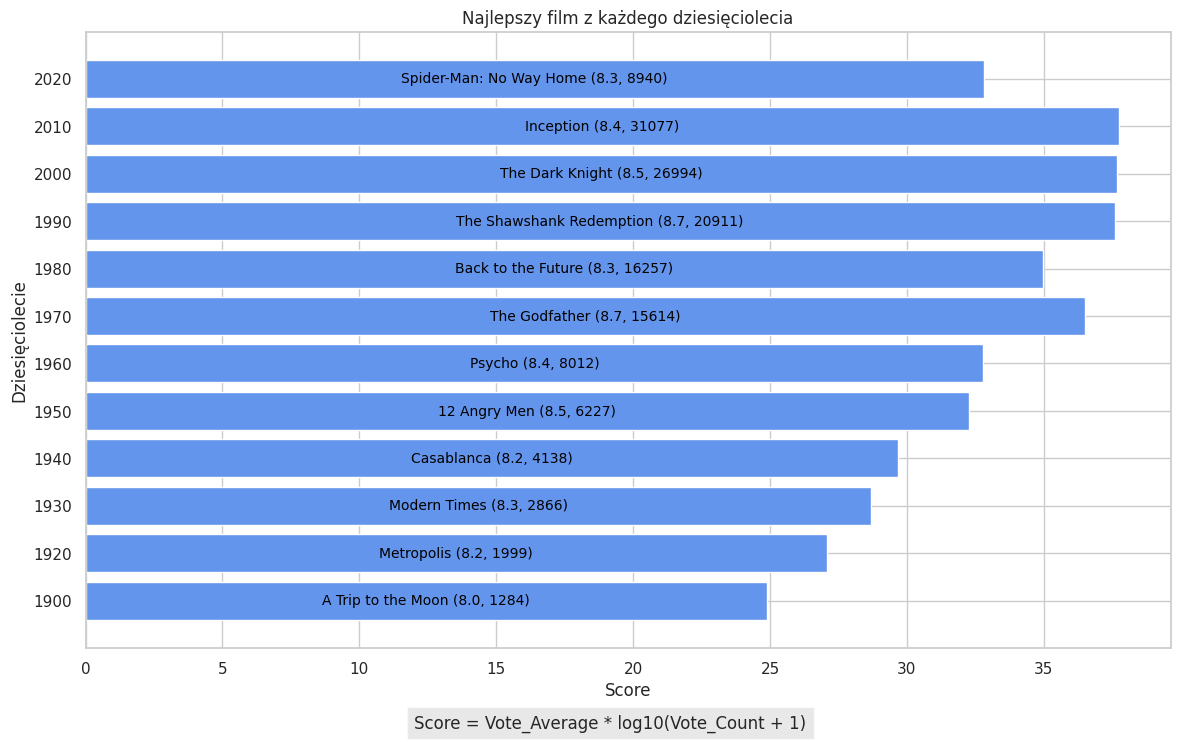

In [ ]:
df = pd.read_csv("movies.csv")

df["Release_Date"] = pd.to_datetime(df["Release_Date"], errors="coerce")
df = df.loc[df["Release_Date"].notna()].copy()  # kopia po filtrowaniu
df["Release_Year"] = df["Release_Date"].dt.year.astype(int)

df["Vote_Count"] = pd.to_numeric(df["Vote_Count"], errors="coerce")
df["Vote_Average"] = pd.to_numeric(df["Vote_Average"], errors="coerce")

df = df.dropna(subset=["Vote_Average", "Vote_Count"]).copy()  # kopia po dropna()

df["Decade"] = (df["Release_Year"] // 10) * 10
df["score"] = df["Vote_Average"] * np.log10(df["Vote_Count"] + 1)

# najlepsze filmy z dziesieciolecia
best_films = df.loc[df.groupby("Decade")["score"].idxmax()].sort_values("Decade")

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
bars = plt.barh(best_films["Decade"].astype(str), best_films["score"], color="cornflowerblue")

# tutuly na slupki
for bar, (_, row) in zip(bars, best_films.iterrows()):
    text = f'{row["Title"]} ({row["Vote_Average"]}, {int(row["Vote_Count"])})'
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, text,
             ha="center", va="center", fontsize=10, color="black")

plt.xlabel("Score")
plt.ylabel("Dziesięciolecie")
plt.title("Najlepszy film z każdego dziesięciolecia")

plt.figtext(0.5, 0.01, "Score = Vote_Average * log10(Vote_Count + 1)", ha="center", fontsize=12,
            bbox={"facecolor": "lightgrey", "alpha": 0.5, "pad": 5})

plt.show()


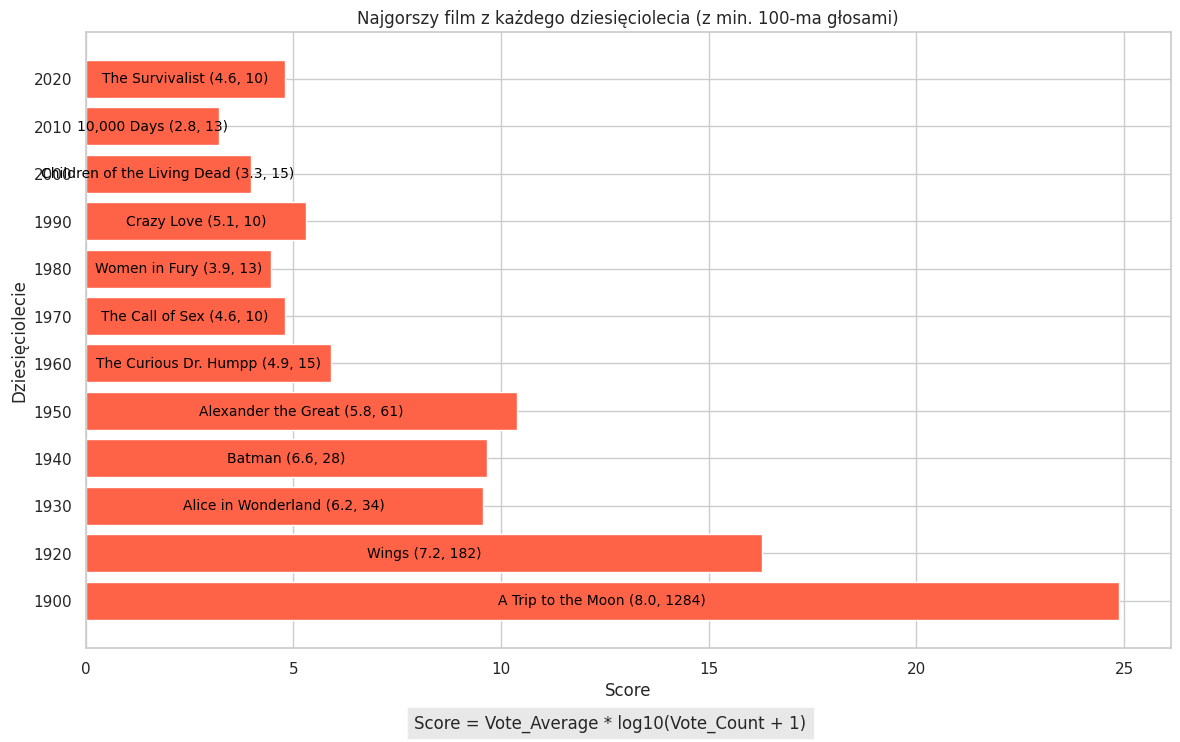

In [3]:
df = pd.read_csv("movies.csv")
df["Release_Date"] = pd.to_datetime(df["Release_Date"], errors="coerce")
df["Release_Year"] = df["Release_Date"].dt.year

df = df.loc[df["Release_Year"].notna()]
df["Release_Year"] = df["Release_Year"].astype(int)
df["Vote_Count"] = pd.to_numeric(df["Vote_Count"], errors="coerce")
df["Vote_Average"] = pd.to_numeric(df["Vote_Average"], errors="coerce")

# przynajmniej 100 glosow (zeby odrzucic takie co mialy 0 glosow => ocena = 0)
df = df[df["Vote_Count"] >= 10]

df = df.dropna(subset=["Vote_Average", "Vote_Count"])

df["Decade"] = (df["Release_Year"] // 10) * 10
df["score"] = df["Vote_Average"] * np.log10(df["Vote_Count"] + 1)

worst_films = df.loc[df.groupby("Decade")["score"].idxmin()].sort_values("Decade")

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
bars = plt.barh(worst_films["Decade"].astype(str), worst_films["score"], color="tomato")

for bar, (_, row) in zip(bars, worst_films.iterrows()):
   text = f'{row["Title"]} ({row["Vote_Average"]}, {int(row["Vote_Count"])})'
   plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, text,
            ha="center", va="center", fontsize=10, color="black")

plt.xlabel("Score")
plt.ylabel("Dziesięciolecie")
plt.title("Najgorszy film z każdego dziesięciolecia (z min. 100-ma głosami)")

plt.figtext(0.5, 0.01, "Score = Vote_Average * log10(Vote_Count + 1)", ha="center", fontsize=12,
           bbox={"facecolor": "lightgrey", "alpha": 0.5, "pad": 5})

plt.show()

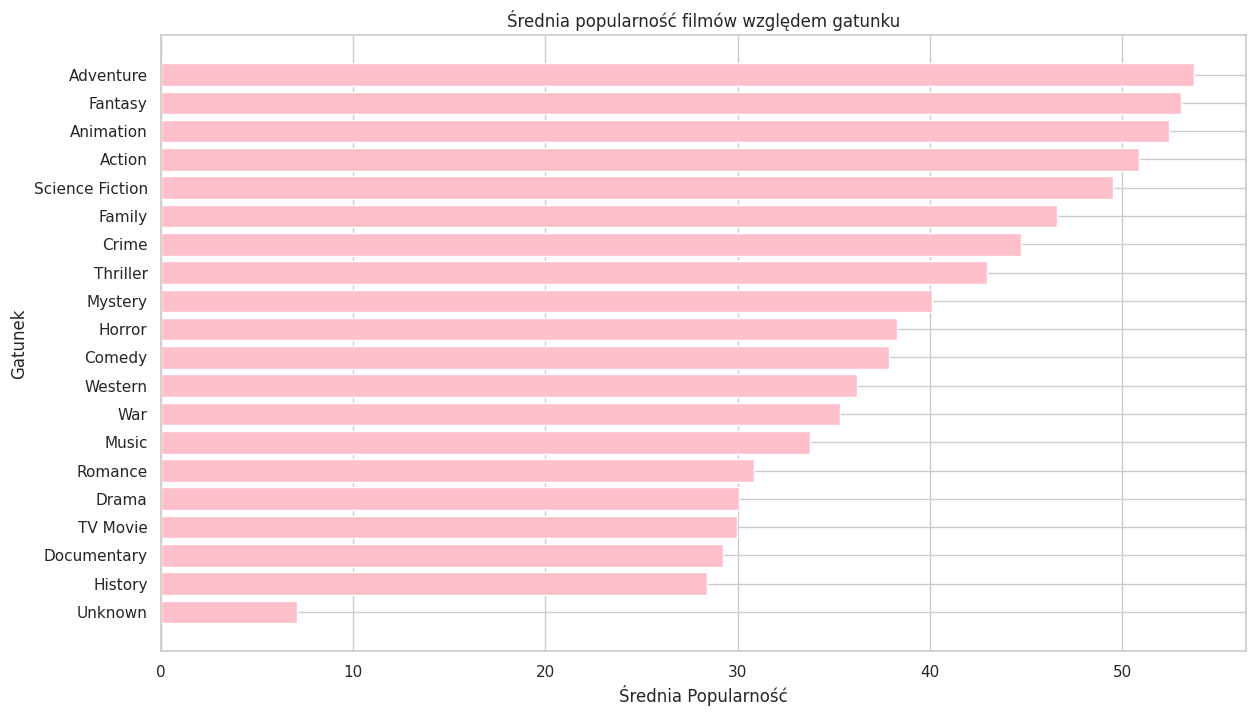

In [ ]:
df = pd.read_csv("movies.csv")

df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
df["Genre"] = df["Genre"].fillna("Unknown") #jesli brak danych

df["Genre"] = df["Genre"].str.split(", ")  # gatunki w liste
df_exploded = df.explode("Genre")  # rozdzielenie na osobne wiersze

genre_popularity = df_exploded.groupby("Genre")["Popularity"].mean().sort_values(ascending=True)

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
bars = plt.barh(genre_popularity.index, genre_popularity.values, color="pink")

plt.xlabel("Średnia Popularność")
plt.ylabel("Gatunek")
plt.title("Średnia popularność filmów względem gatunku")

plt.show()

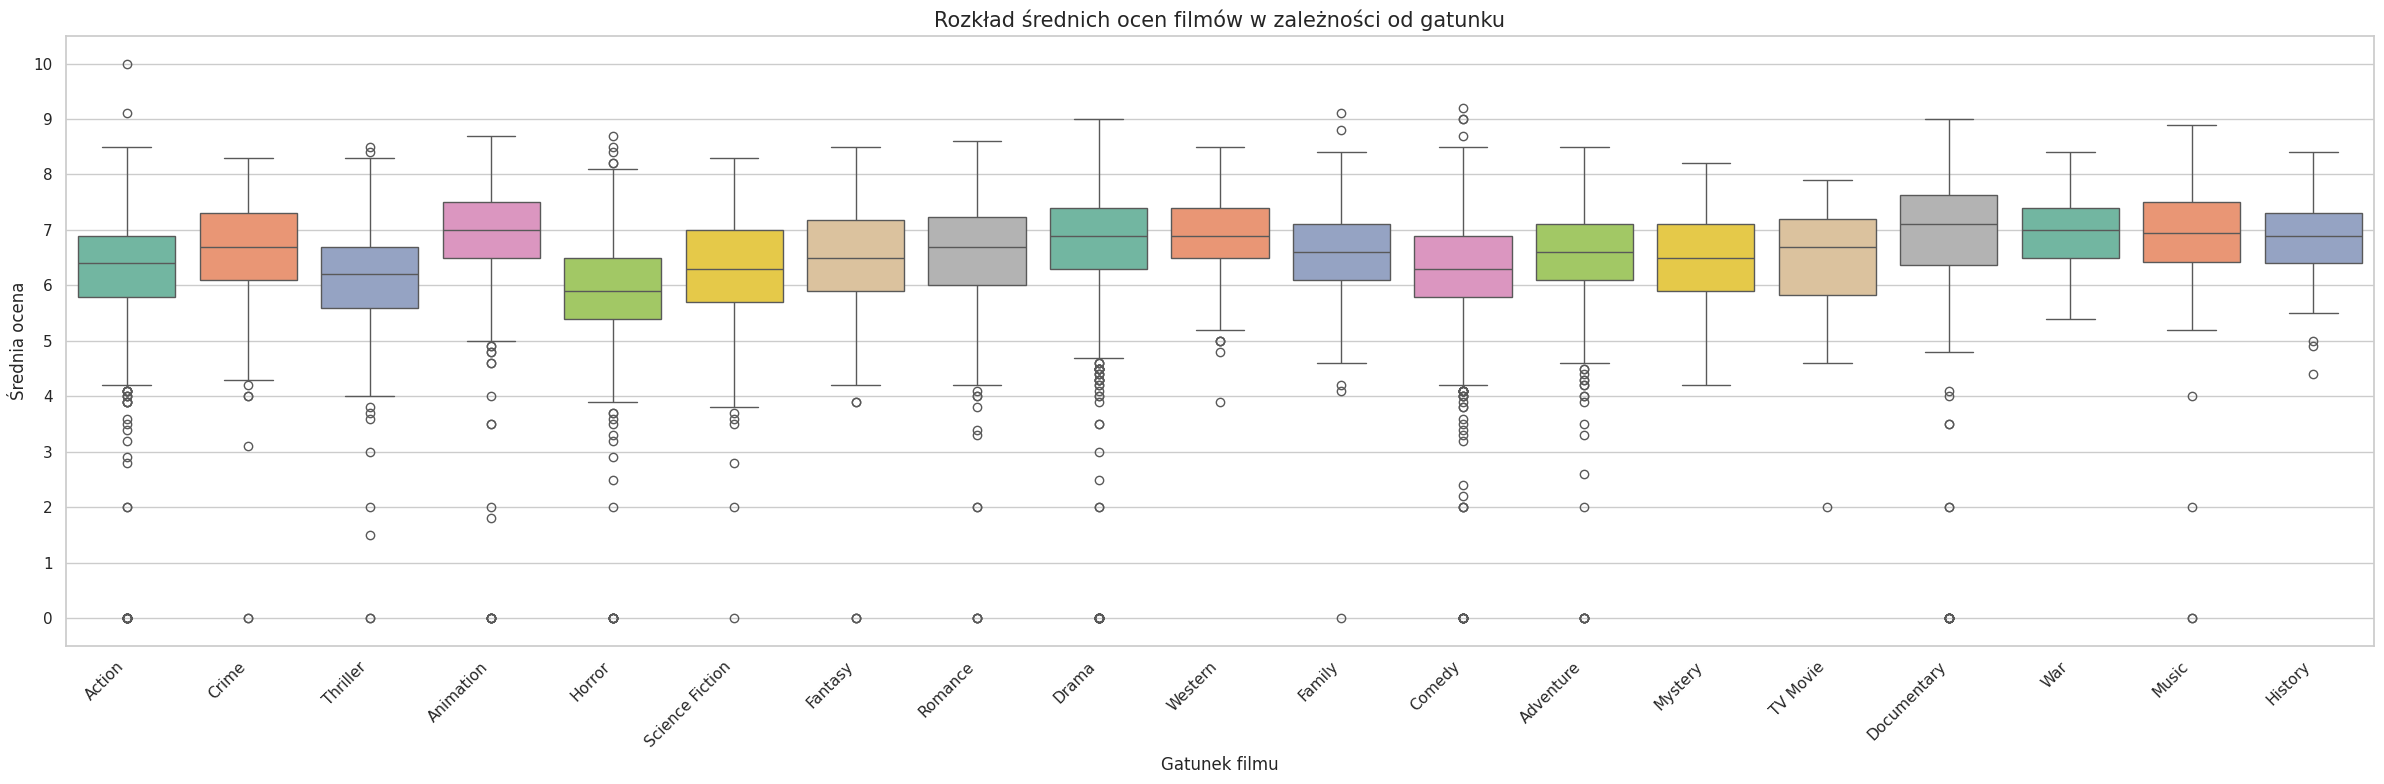

In [ ]:
df = pd.read_csv('movies.csv')
df['Genre'] = df['Genre'].str.split(',').str[0]

df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')
df.dropna(inplace=True)

plt.figure(figsize=(24, 8))
sns.boxplot(x='Genre', y='Vote_Average', data=df, hue='Genre', palette='Set2', legend=False)

plt.xticks(rotation=45, ha='right')

plt.yticks(range(0, 11, 1))

plt.title('Rozkład średnich ocen filmów w zależności od gatunku', fontsize=15)
plt.xlabel('Gatunek filmu', fontsize=12)
plt.ylabel('Średnia ocena', fontsize=12)

plt.tight_layout()
plt.show()

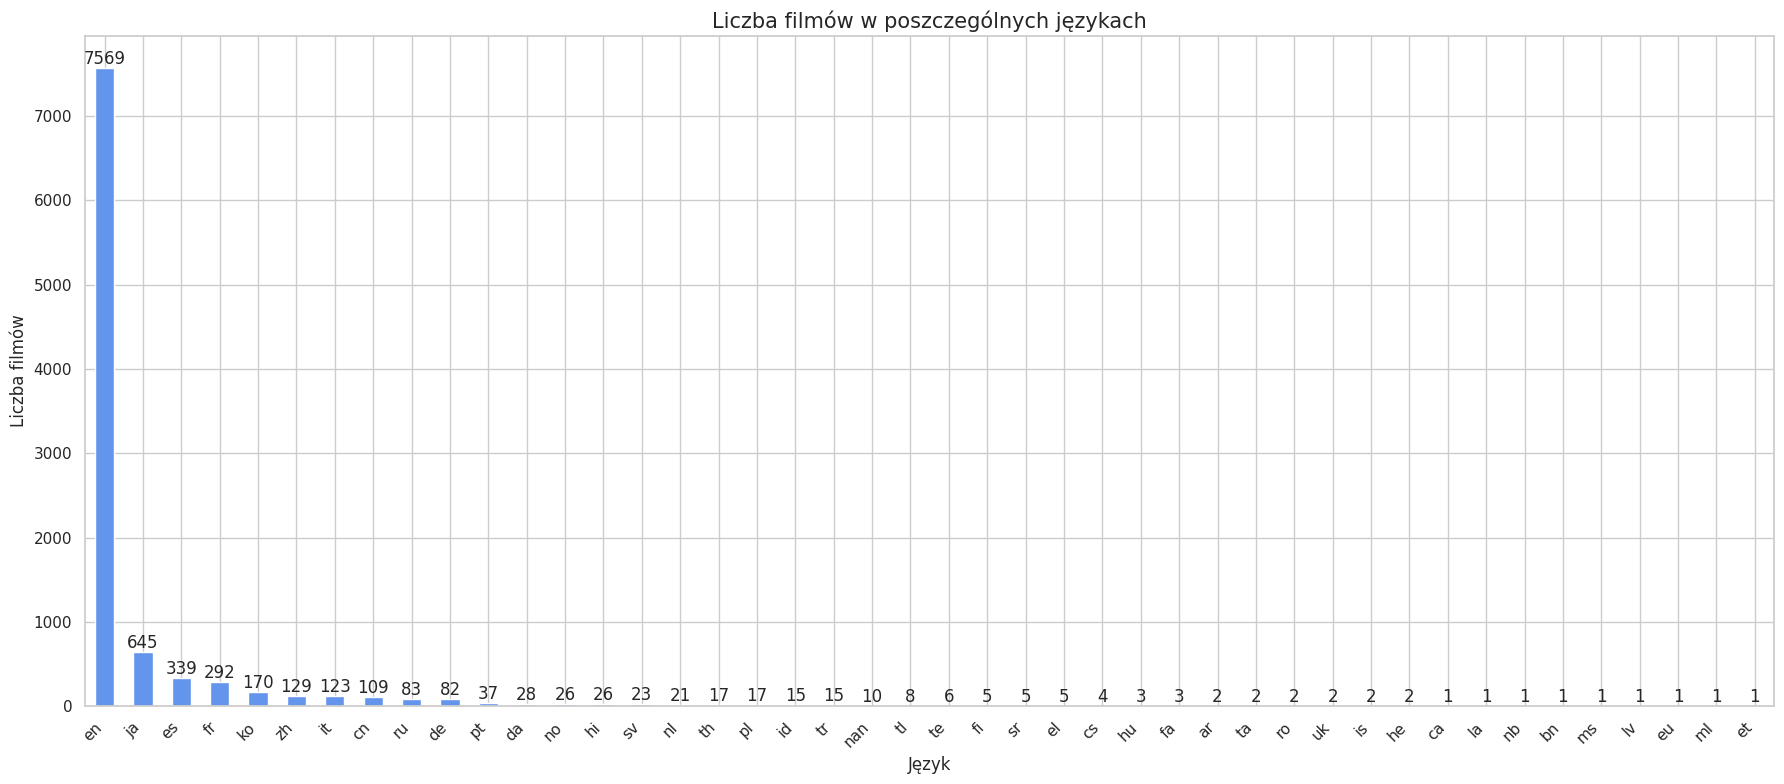

In [ ]:
df = pd.read_csv('movies.csv')
df['Original_Language'] = df['Original_Language'].astype(str)

#usuwanie .jpg lub NaN, jpg sie tu znajdowalo jedno dlatego musialem zastosowac ale to chyba pomylka tworcow tego datasetu albo ja cos przekrecilem (xd)
df = df[~df['Original_Language'].str.contains('.jpg')]

language_counts = df['Original_Language'].value_counts()

plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")

language_counts.plot(kind='bar', color='cornflowerblue')

plt.title('Liczba filmów w poszczególnych językach', fontsize=15)
plt.xlabel('Język', fontsize=12)
plt.ylabel('Liczba filmów', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(language_counts):
  plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

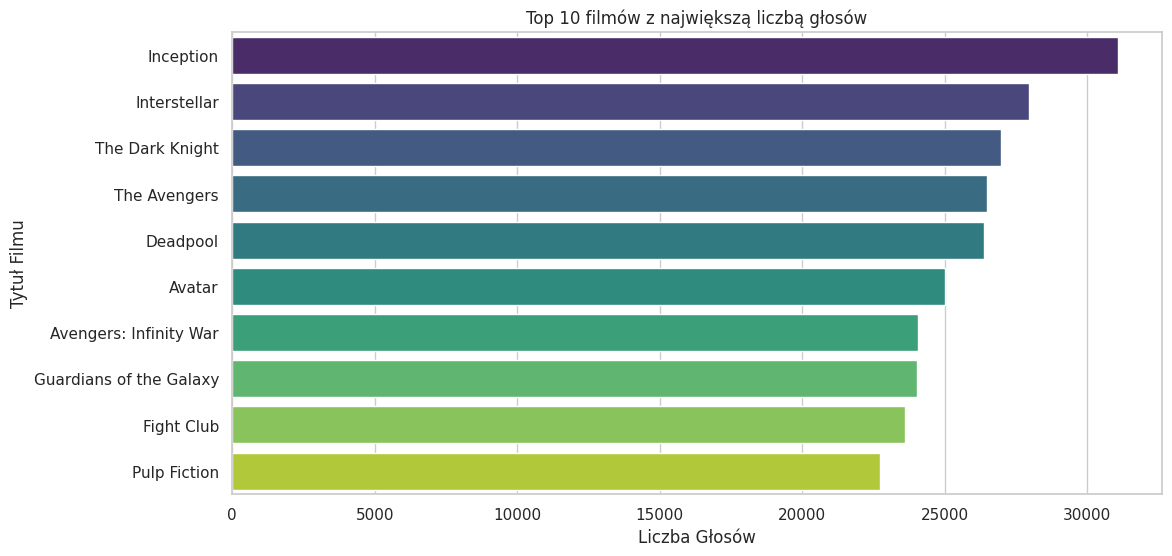

In [ ]:
df["Vote_Count"] = pd.to_numeric(df["Vote_Count"], errors="coerce")

top_voted_movies = df.nlargest(10, "Vote_Count")[["Title", "Vote_Count"]]

plt.figure(figsize=(12, 6))
sns.barplot(
    y=top_voted_movies["Title"],
    x=top_voted_movies["Vote_Count"],
    hue=top_voted_movies["Title"],
    palette="viridis",
    legend=False
)

plt.xlabel("Liczba Głosów")
plt.ylabel("Tytuł Filmu")
plt.title("Top 10 filmów z największą liczbą głosów")

plt.show()

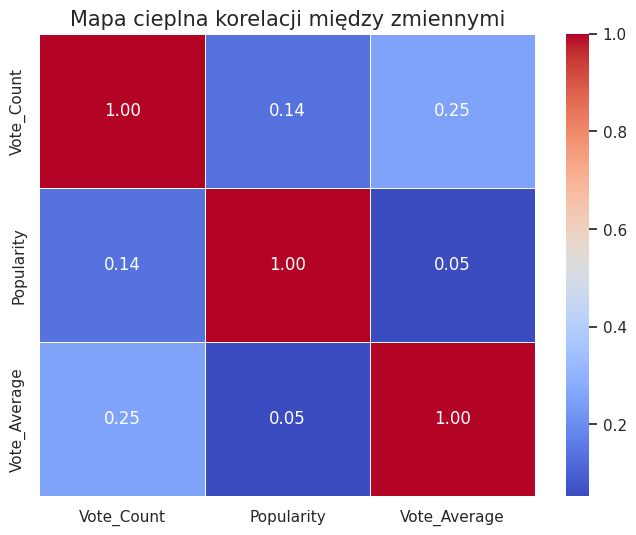

In [ ]:
corr = df[['Vote_Count', 'Popularity', 'Vote_Average']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa cieplna korelacji między zmiennymi', fontsize=15)
plt.show()


#ML
### 1. Regresja - przewidywanie popularności filmu
### 2. Klasyfikacja - przewidywanie kategorii popularności
### 3. Klasteryzacja - grupowanie filmów

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# przygotowanie danych
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')

# wybor cech
df['Genre'] = df['Genre'].fillna('Unknown')
df['Original_Language'] = df['Original_Language'].fillna('Unknown')

# podzial na cechy i cel
X = df[['Genre', 'Original_Language', 'Vote_Average', 'Vote_Count']]
y = df['Popularity']

# usuniecie wierszy z brakujacymi wartosciami
X = X.dropna()
y = y[X.index]

# podział na zbior treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Vote_Average', 'Vote_Count']),
        ('cat_genre', OneHotEncoder(handle_unknown='ignore'), ['Genre']),
        ('cat_lang', OneHotEncoder(handle_unknown='ignore'), ['Original_Language'])
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

# predykcja
y_pred = model.predict(X_test)

# - Mean squared error (sredni blad kwadratowy)
# - R2 Score (jak dobrze model wyjaśnia zmienność danych)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred)) #no tu troche lipnie wyszedl akurat R2 < 0

Mean Squared Error: 25019.71728982745
R2 Score: -0.04762558694822738


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# kategorie popularnoci
df['Popularity_Category'] = pd.cut(df['Popularity'],
    bins=[0, 10, 50, 100, float('inf')],
    labels=['Niska', 'Średnia', 'Wysoka', 'Bardzo wysoka'])

# wybor cech
X = df[['Genre', 'Original_Language', 'Vote_Average', 'Vote_Count']]
y = df['Popularity_Category']

# usunięcie wierszy z brakujacymi wartościami
X = X.dropna()
y = y[X.index]

# podzial na zbior treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Vote_Average', 'Vote_Count']),
        ('cat_genre', OneHotEncoder(handle_unknown='ignore'), ['Genre']),
        ('cat_lang', OneHotEncoder(handle_unknown='ignore'), ['Original_Language'])
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

# predykcja
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

Bardzo wysoka       0.50      0.17      0.25       114
       Wysoka       0.29      0.10      0.15       201
      Średnia       0.86      0.97      0.92      1651

     accuracy                           0.84      1966
    macro avg       0.55      0.41      0.44      1966
 weighted avg       0.78      0.84      0.80      1966



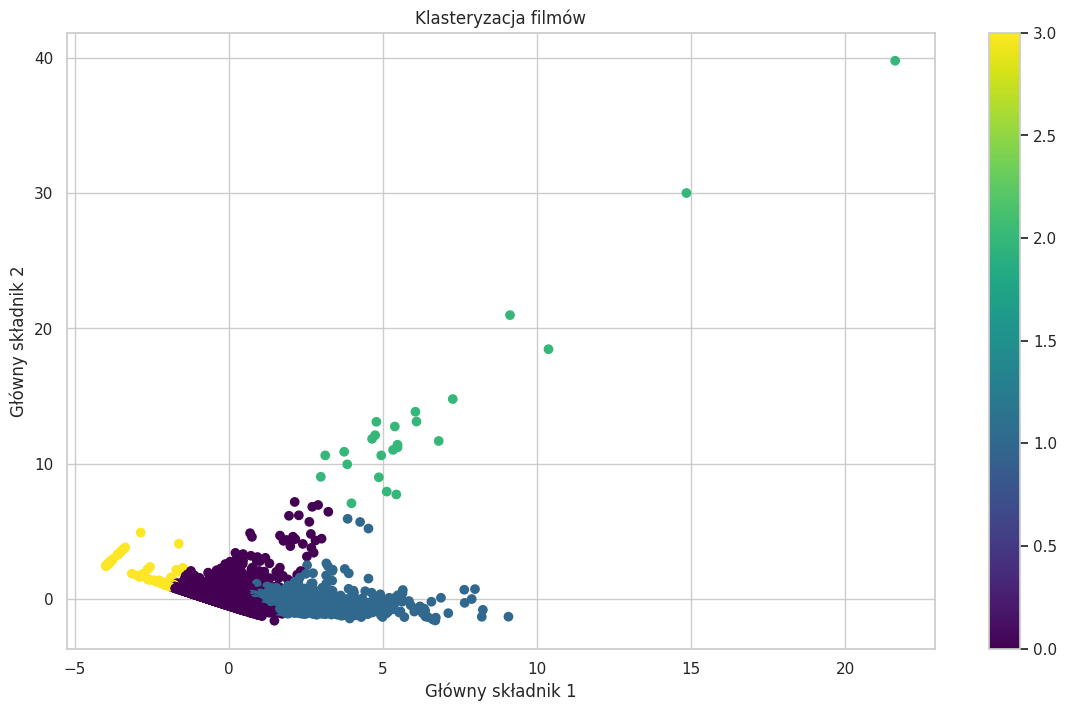

          Popularity  Vote_Average   Vote_Count
Cluster                                        
0.0        32.476050      6.474030   844.705483
1.0        87.216278      7.315217  9387.596273
2.0      1745.432333      6.662500  1704.416667
3.0        36.971934      1.169461    34.730539


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Popularity', 'Vote_Average', 'Vote_Count']
X = df[features].dropna()

# standaryzacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# redukcja wymiarowosci dla wizualizacji
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# klasteryzacja
kmeans = KMeans(n_clusters=4, random_state=42)
df.loc[X.index, 'Cluster'] = kmeans.fit_predict(X_scaled)

# wizualizacja
plt.figure(figsize=(14, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Klasteryzacja filmów')
plt.xlabel('Główny składnik 1')
plt.ylabel('Główny składnik 2')
plt.colorbar(scatter)
plt.show()

# charakterystyka klastrow
print(df.groupby('Cluster')[features].mean())